# Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading our dataset**

In [ ]:
salary = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/Salary_Data.csv?raw=true')

In [ ]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Checking the info of our data**

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**Checking the Null values in our data**

In [ ]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**Ploting the histplot to check the distribution**

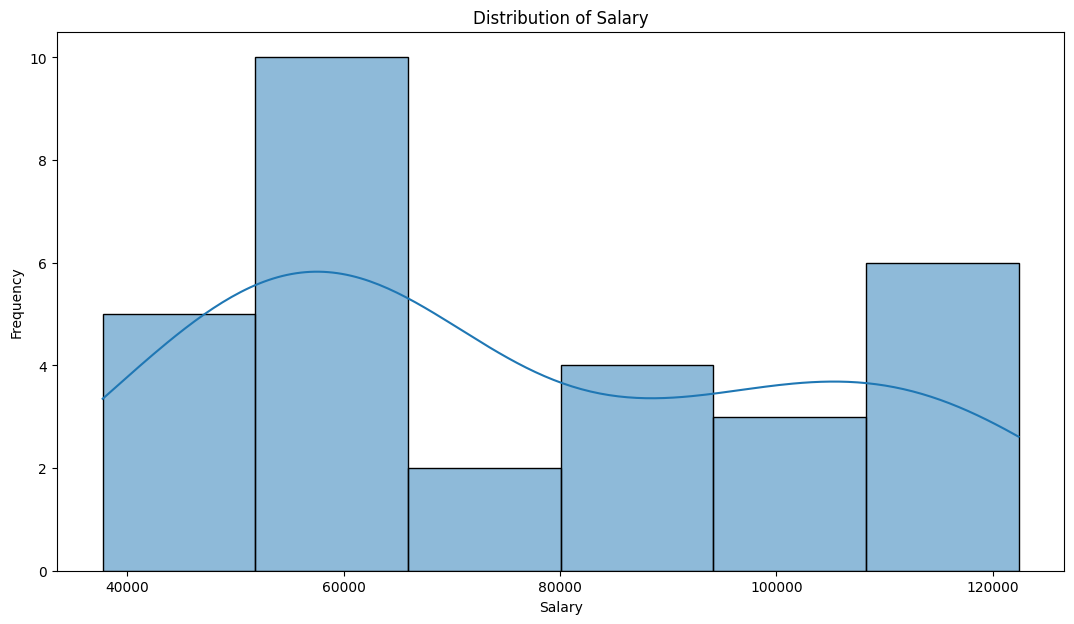

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(data=salary, x="Salary", kde=True)
plt.title("Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()


**Ploting the scatter plot to see the relation ships between the Experience and Salary**

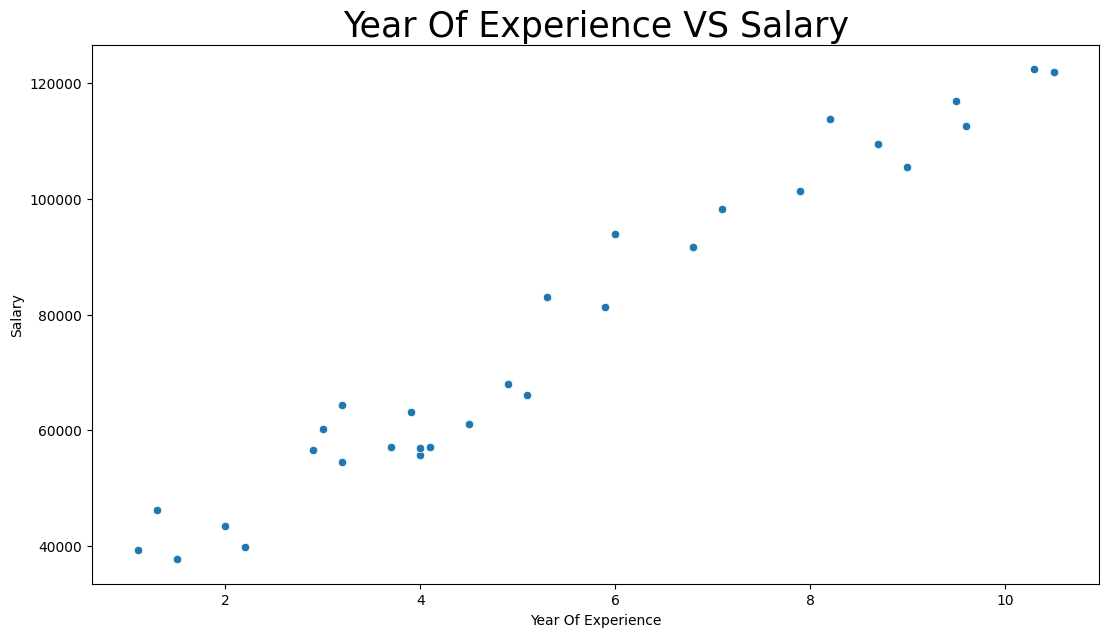

In [ ]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=salary,x='YearsExperience',y='Salary')
plt.title('Year Of Experience VS Salary',size=25)
plt.xlabel('Year Of Experience')
plt.ylabel('Salary')
plt.show()

# Applying linear Regression

In [ ]:
X = salary['YearsExperience']
Y = salary['Salary']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [ ]:
X_train = pd.DataFrame(X_train)


In [ ]:
linear_regression.fit(X_train,Y_train)

LinearRegression()

# Making Prediction

In [ ]:
m = linear_regression.coef_

In [ ]:
c = linear_regression.intercept_

In [ ]:
y = m[0]*8.7 + c

In [ ]:
y

108172.10301013323

In [ ]:
linear_regression.predict([[8.7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([108172.10301013])

In [ ]:
X_test.iloc[1]

8.7

In [ ]:
Y_test.iloc[1]

109431.0

In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
predictions = linear_regression.predict(X_test)

In [ ]:
Y_test

20     91738.0
24    109431.0
7      54445.0
18     81363.0
2      37731.0
27    112635.0
Name: Salary, dtype: float64

# Checking Performance of the Model

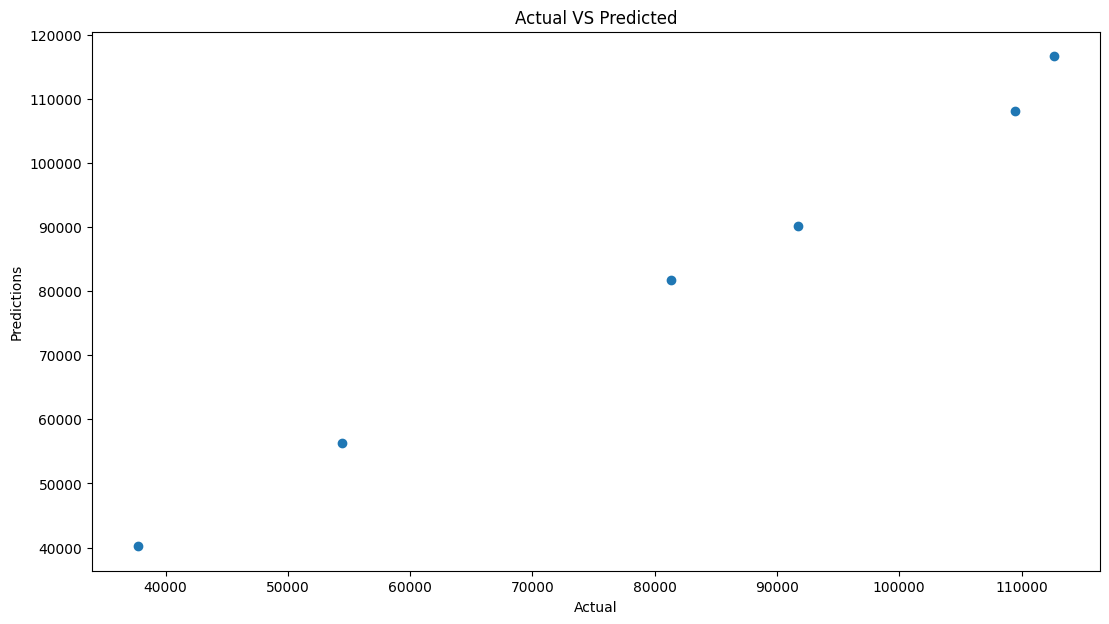

In [ ]:
plt.figure(figsize=(13,7))
plt.scatter(Y_test,predictions)
plt.title('Actual VS Predicted')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("Root Mean squared error:", rmse)
print("R-squared score:", r2)
